In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
# Load data
data = pd.read_csv("DietChartPlan.csv")

In [4]:

# Data Inspection
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,DietName,DietType,FoodName,FoodDescription,Protein,Calories,Carbs,Goal,Image
0,Weight Loss Diets,Low-Carb Diet,Bacon and Eggs Scramble,Start your day with the classic combination of...,23.0,370,6.0,Weight Loss,https://brooklynfarmgirl.com/wp-content/upload...
1,Weight Loss Diets,Low-Carb Diet,Avocado and Smoked Salmon Roll-Ups,Indulge in the creamy richness of avocado pair...,30.4,250,25.2,Weight Loss,https://images.squarespace-cdn.com/content/v1/...
2,Weight Loss Diets,Low-Carb Diet,Cheese and Spinach Stuffed Chicken Breast,Elevate your dinner with cheese and spinach st...,161.0,1557,35.0,Weight Loss,https://www.spendwithpennies.com/wp-content/up...
3,Weight Loss Diets,Low-Carb Diet,Cauliflower and Cheese Soup,Warm up with a comforting bowl of cauliflower ...,14.8,270,24.8,Weight Loss,https://tmbidigitalassetsazure.blob.core.windo...
4,Weight Loss Diets,Low-Carb Diet,Almond Flour Pancakes with Butter,Indulge in fluffy and flavorful almond flour p...,10.5,243,8.6,Weight Loss,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [5]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DietName         368 non-null    object 
 1   DietType         368 non-null    object 
 2   FoodName         368 non-null    object 
 3   FoodDescription  368 non-null    object 
 4   Protein          368 non-null    float64
 5   Calories         368 non-null    int64  
 6   Carbs            368 non-null    float64
 7   Goal             368 non-null    object 
 8   Image            368 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 26.0+ KB


In [6]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
DietName           0
DietType           0
FoodName           0
FoodDescription    0
Protein            0
Calories           0
Carbs              0
Goal               0
Image              0
dtype: int64


In [7]:
print("\nUnique values in DietName:", data['DietName'].unique())
print("Unique values in DietType:", data['DietType'].unique())


Unique values in DietName: ['Weight Loss Diets' 'Weight Gain Muscle Building Diets'
 'Health Maintenance Diets' 'Medical Diets']
Unique values in DietType: ['Low-Carb Diet' 'Ketogenic Diet' 'Mediterranean Diet'
 'Plant-Based/Vegan Diet' 'Intermittent Fasting' 'High-Protein Diet'
 'Bulking Diet' 'Weight Gain Shake Supplement-based Diet'
 'Calorie Surplus Diet' 'Carb Cycling Diet' 'Balanced Diet' 'DASH Diet'
 'Whole30 Diet' 'Flexitarian Diet' 'Paleo Diet' 'Gluten Free Diet'
 'Low FODMAP Diet' 'Low-Sodium Diet' 'Renal Diet' 'Diabetic Diet']


In [8]:
# Encode categorical variables
label_encoder_DietName = LabelEncoder()
data['DietName_encoded'] = label_encoder_DietName.fit_transform(data['DietName'])

In [9]:
label_encoder_DietType = LabelEncoder()
data['DietType_encoded'] = label_encoder_DietType.fit_transform(data['DietType'])

In [10]:
# Features and Target
X = data[['DietName_encoded', 'DietType_encoded', 'Protein', 'Calories']].values
y = data['FoodName'].values

In [11]:
data['FoodName'].value_counts()

FoodName
Grilled Chicken Breast                       6
Greek Yogurt                                 4
Hard-Boiled Eggs                             4
Cottage Cheese                               3
Baked Cod Fillet                             3
                                            ..
Greens with Homemade Paleo Ranch Dressing    1
Shrimp with Zucchini Noodles                 1
Almond Flour Pancakes with Butter            1
Cheese and Spinach Stuffed Chicken Breast    1
Avocado and Smoked Salmon Roll-Ups           1
Name: count, Length: 320, dtype: int64

In [12]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Train model
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [14]:
# Save model
with open("ModelFile.pkl", "wb") as model_file:
    pickle.dump((classifier, label_encoder_DietName, label_encoder_DietType), model_file)

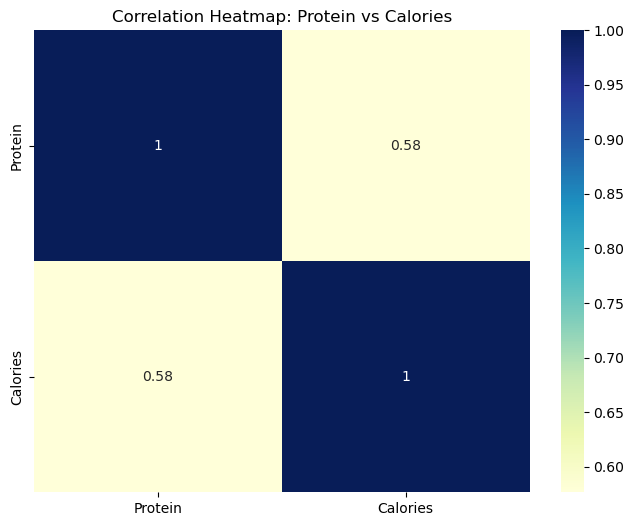

In [15]:

# ---- VISUALIZATION ----
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Protein', 'Calories']].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap: Protein vs Calories")
plt.show()

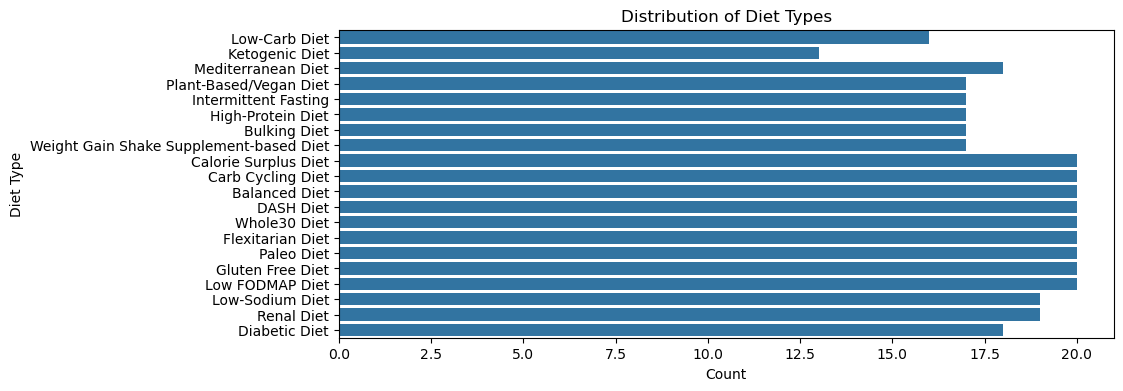

In [16]:
# Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(y='DietType', data=data)
plt.title("Distribution of Diet Types")
plt.xlabel("Count")
plt.ylabel("Diet Type")
plt.show()

In [17]:
# ---- MODEL EVALUATION ----
# Predictions
y_pred = classifier.predict(X_val)

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred, labels=classifier.classes_)

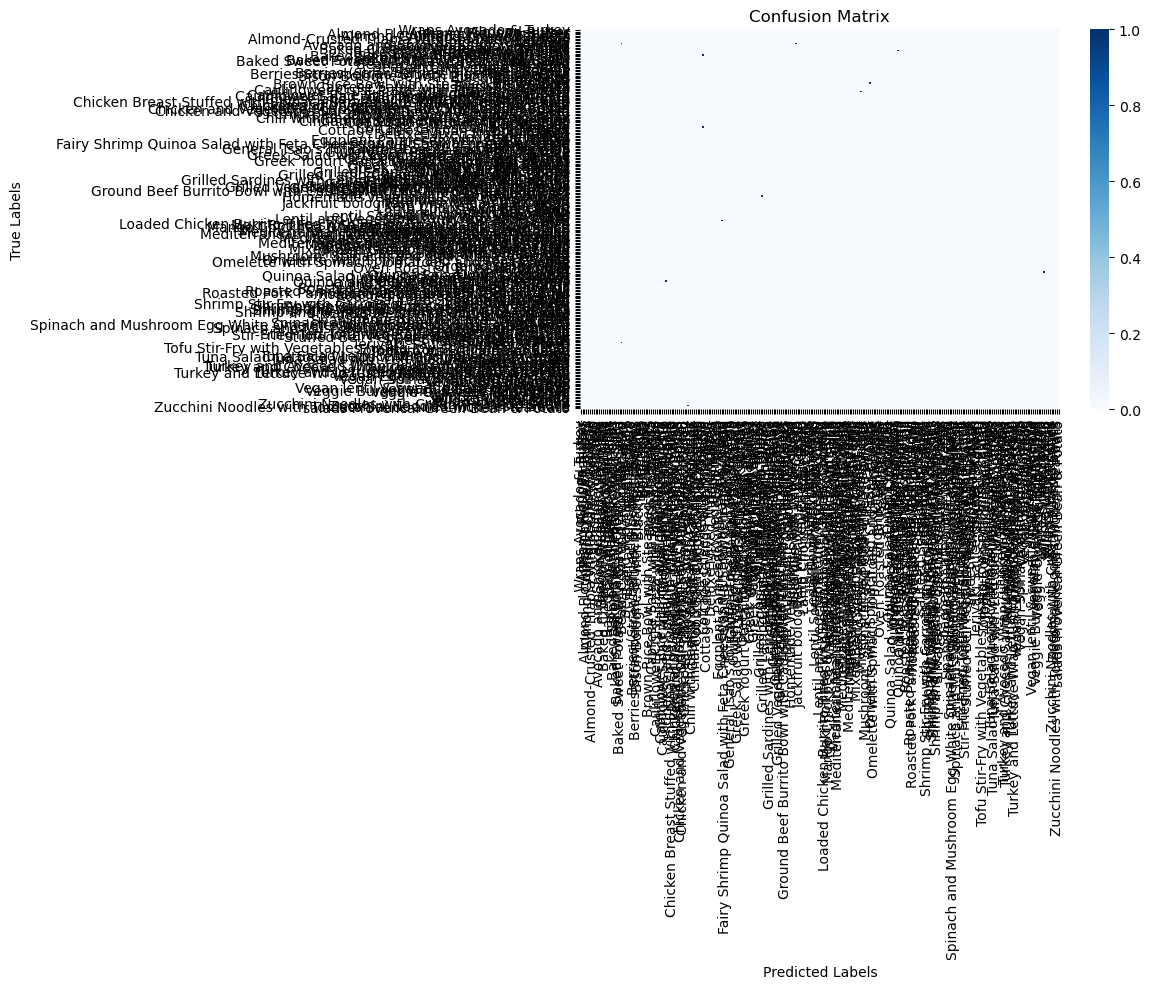

In [19]:
# Confusion Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
classifier.score(X_train, y_train)

0.9761904761904762

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [22]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)
conf_matrix_lr = confusion_matrix(y_val, y_pred_lr, labels=log_reg.classes_)
print("Logistic Regression Accuracy (train):", log_reg.score(X_train, y_train))
print("Confusion Matrix:\n", conf_matrix_lr)

Logistic Regression Accuracy (train): 0.09183673469387756
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


d:\anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
svm_clf = SVC(kernel='linear', random_state=0)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_val)
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm, labels=svm_clf.classes_)
print("\nSVM Accuracy (train):", svm_clf.score(X_train, y_train))
print("Confusion Matrix:\n", conf_matrix_svm)



SVM Accuracy (train): 0.9523809523809523
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
# --- K-Nearest Neighbors (KNN) ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn, labels=knn.classes_)
print("\nKNN Accuracy (train):", knn.score(X_train, y_train))
print("Confusion Matrix:\n", conf_matrix_knn)


KNN Accuracy (train): 0.22789115646258504
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
# --- Decision Tree ---
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_val)
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt, labels=dt_clf.classes_)
print("\nDecision Tree Accuracy (train):", dt_clf.score(X_train, y_train))
print("Confusion Matrix:\n", conf_matrix_dt)


Decision Tree Accuracy (train): 0.9931972789115646
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
